<a href="https://colab.research.google.com/github/17092003vamsi/guner/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/project 2 sap.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows
print(data.head())
print(data.info())

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

           0           1           2          3          4          5  \
0  77.374046   75.621507   74.827457  61.264341  40.528815  39.432864   
1  88.081757  113.156798  105.854388  79.869821  64.849549  54.186113   
2  61.157782   76.724459   76.431511  70.389519  68.768628  54.645471   
3  25.682363   28.009787   25.439136  23.391549  23.497388  16.403860   
4  36.548754   50.955488   49.968908  43.540421  43.091401  32.390871   

           6          7          8          9  ...      2082      2083  \
0  44.749402  47.503784  48.907394  27.498272  ...  0.000426  0.000308   
1  49.262768  45.522822  35.178623  29.644172  ...  0.000609  0.000447   
2  35.151602  20.716670  14.441216  15.043942  ...  0.000322  0.000217   
3  11.542105  13.032593  13.465638   8.640664  ...  0.000137  0.000099   
4  12.458096  -2.237221  -0.164592   2.146683  ...  0.000376  0.000289   

       2084      2085      2086      2087      2088      2089       Type  \
0  0.000189  0.000070 -0.000049 -0.00016

In [ ]:
print(data.dtypes)

print(data.isnull().sum())

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
2087     float64
2088     float64
2089     float64
Type      object
Lable     object
Length: 2092, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
2087     0
2088     0
2089     0
Type     0
Lable    0
Length: 2092, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming the last column is the label and the others are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Encode labels (if they are categorical)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Reshape X if necessary (e.g., to 2D or 3D for CNN input)
# Assuming each sample is a signal that needs to be reshaped for CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training data shape:", y_train.shape)
print("Test data shape:", y_test.shape)

Training data shape: (745, 2091, 1)
Test data shape: (187, 2091, 1)
Training data shape: (745,)
Test data shape: (187,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2089, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1044, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1042, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 521, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 519, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 259, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,243,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,274,753 (16.31 MB)

 Trainable params: 4,274,753 (16.31 MB)

 Non-trainable params: 0 (0.00 B)

Validation Accuracy: 89.31%
Test Accuracy: 92.86%

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.96      0.96      0.96        50
           2       0.87      0.96      0.91        50
           3       0.96      0.96      0.96        45
           4       0.92      0.82      0.87        40
           5       0.88      0.88      0.88        49

    accuracy                           0.93       280
   macro avg       0.93      0.93      0.93       280
weighted avg       0.93      0.93      0.93       280



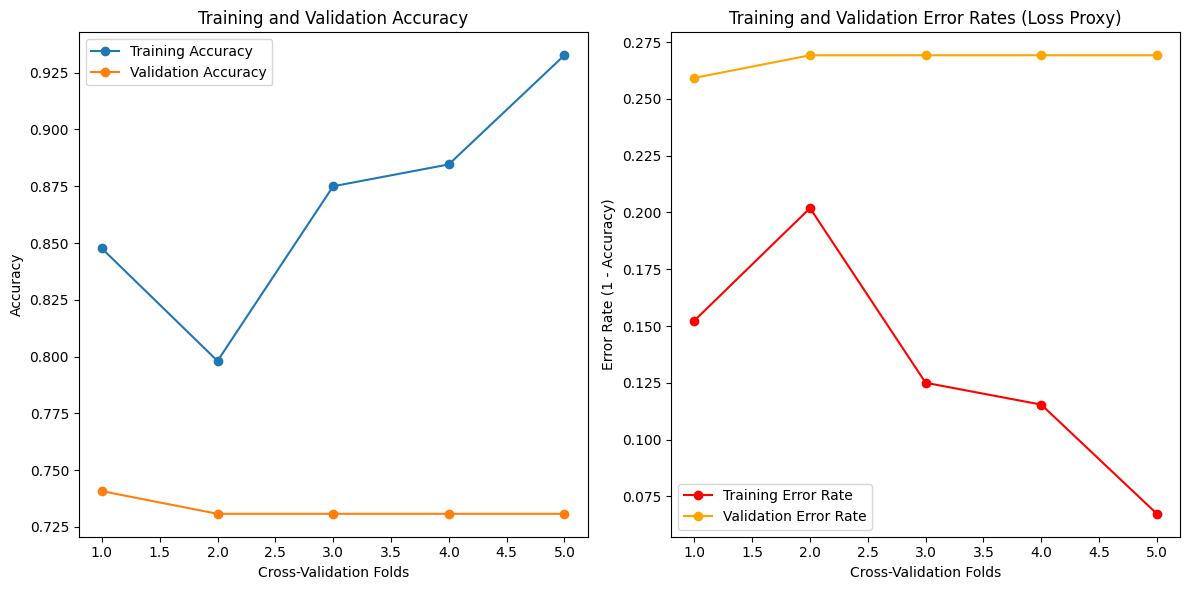

Class: A
  True Positives (TP): 45
  False Positives (FP): 0
  True Negatives (TN): 234
  False Negatives (FN): 1
------------------------------------------------
Class: A-S
  True Positives (TP): 48
  False Positives (FP): 2
  True Negatives (TN): 228
  False Negatives (FN): 2
------------------------------------------------
Class: G
  True Positives (TP): 48
  False Positives (FP): 7
  True Negatives (TN): 223
  False Negatives (FN): 2
------------------------------------------------
Class: G-S
  True Positives (TP): 43
  False Positives (FP): 2
  True Negatives (TN): 233
  False Negatives (FN): 2
------------------------------------------------
Class: HPM
  True Positives (TP): 33
  False Positives (FP): 3
  True Negatives (TN): 237
  False Negatives (FN): 7
------------------------------------------------
Class: HPM-S
  True Positives (TP): 43
  False Positives (FP): 6
  True Negatives (TN): 225
  False Negatives (FN): 6
------------------------------------------------


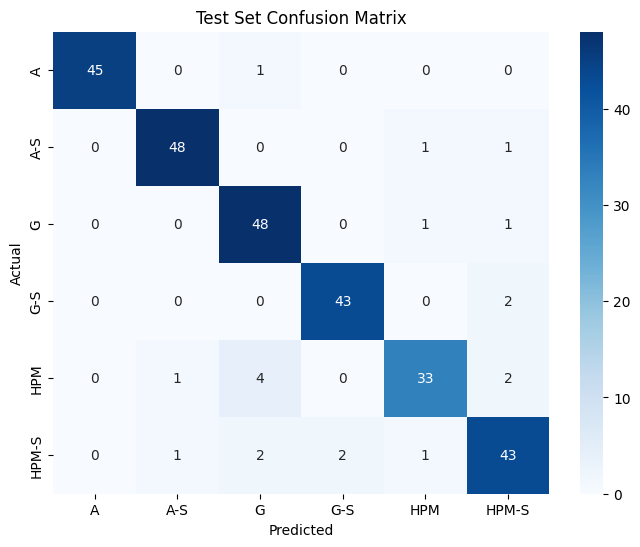

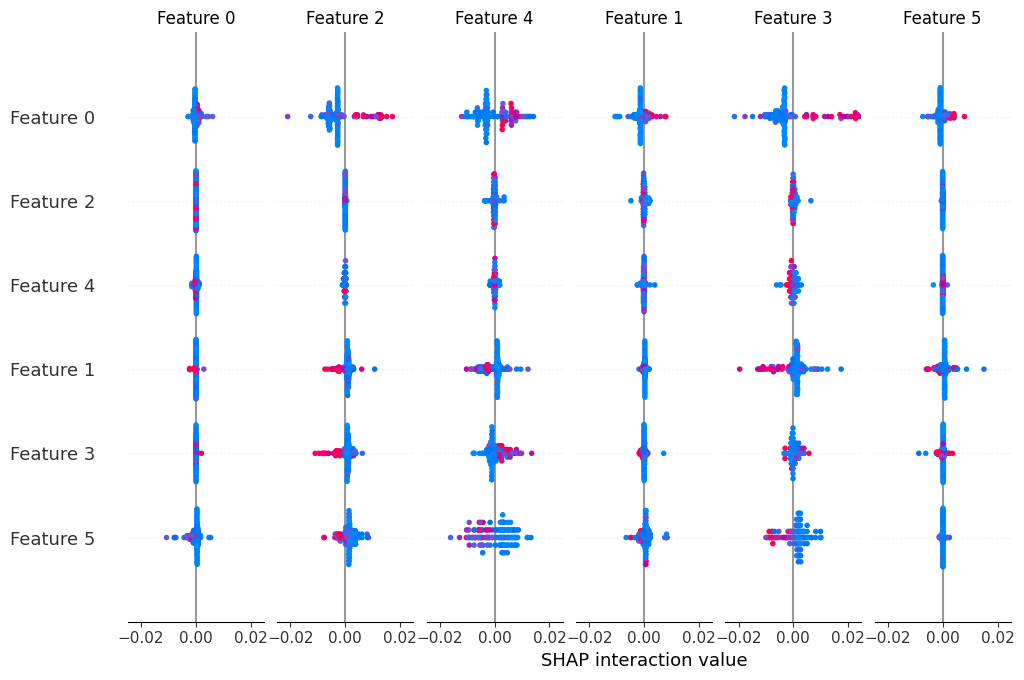

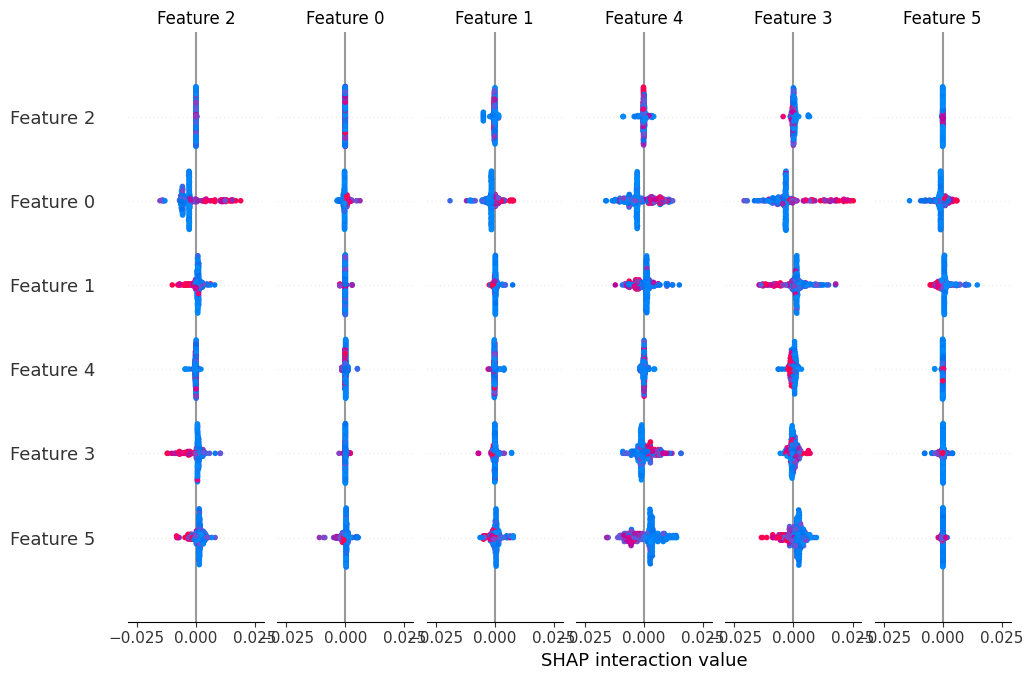

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'project 2 sap.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Preprocessing: Encode labels and drop non-numeric columns
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Lable'])  # Encode the categorical 'Lable' column
X = data.drop(columns=['Type', 'Lable']).values  # Drop categorical columns 'Type' and 'Lable'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a validation set from the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on validation and test sets
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Accuracy on validation and test sets
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display validation and test accuracy
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


# Display the classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))


# Plotting training & validation accuracy values (using cross-validation for better insights)
train_scores = cross_val_score(model, X_train_split, y_train_split, cv=5)
val_scores = cross_val_score(model, X_val, y_val, cv=5)

# Calculate error rates (1 - accuracy) for training and validation sets
train_error_rates = 1 - train_scores
val_error_rates = 1 - val_scores

epochs = np.arange(1, len(train_scores) + 1)

plt.figure(figsize=(12, 6))
# Plot accuracy values
plt.subplot(1, 2, 1)
plt.plot(epochs, train_scores, label='Training Accuracy', marker='o')
plt.plot(epochs, val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot error rates as "loss-like" values
plt.subplot(1, 2, 2)
plt.plot(epochs, train_error_rates, label='Training Error Rate', marker='o', color='red')
plt.plot(epochs, val_error_rates, label='Validation Error Rate', marker='o', color='orange')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.legend()
plt.title('Training and Validation Error Rates (Loss Proxy)')

plt.tight_layout()
plt.show()

import numpy as np

# Confusion matrix based on the provided image
cm = np.array([[45, 0, 1, 0, 0, 0],
               [0, 48, 0, 0, 1, 1],
               [0, 0, 48, 0, 1, 1],
               [0, 0, 0, 43, 0, 2],
               [0, 1, 4, 0, 33, 2],
               [0, 1, 2, 2, 1, 43]])

class_labels = ['A', 'A-S', 'G', 'G-S', 'HPM', 'HPM-S']

# Function to calculate TP, FP, TN, FN for a specific class
def get_confusion_matrix_metrics(cm, class_index):
    TP = cm[class_index, class_index]  # True Positives
    FP = cm[:, class_index].sum() - TP  # False Positives
    TN = np.delete(np.delete(cm, class_index, 0), class_index, 1).sum()  # True Negatives
    FN = cm[class_index, :].sum() - TP  # False Negatives
    return TP, FP, TN, FN

# Loop through each class and compute metrics
for i, class_label in enumerate(class_labels):
    TP, FP, TN, FN = get_confusion_matrix_metrics(cm, i)
    print(f"Class: {class_label}")
    print(f"  True Positives (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  True Negatives (TN): {TN}")
    print(f"  False Negatives (FN): {FN}")
    print("------------------------------------------------")


# Confusion matrix and classification report for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)  # Use TreeExplainer for tree-based models

# Calculate SHAP values for the validation set
shap_values_val = explainer.shap_values(X_val)

# SHAP summary plot to visualize feature importance as a bar graph
shap.summary_plot(shap_values_val, X_val, plot_type="bar")

# Calculate SHAP values for the test set
shap_values_test = explainer.shap_values(X_test)

# SHAP summary plot for test set as a bar graph
shap.summary_plot(shap_values_test, X_test, plot_type="bar")

